Solar Power Prediction using Linear Regression Model

In [2]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the dataset of solar power using read_csv() of pandas
df=pd.read_csv('/content/03f4d1c1a55947025601.csv')
#Dislpay the first five rows using head() function of pandas
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [4]:
#Display the last five rows using tail() function of pandas
df.tail()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,...,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,...,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060
4212,8.00,80,1025.3,0.0,0.0,100.0,100,100,100,172.66,...,12.72,12.07,17.35,11.38,18.43,16.20,48.452849,76.919574,223.04931,20.055031


In [5]:
#Using shape attritue of pandas we can find the shape of dataset as (rows,columns)
df.shape

(4213, 21)

In [6]:
# Using discribe() function of pandas we can display the statitical measurement of columns
df.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


In [7]:


# info() function gives the information of all columns present in dataset
# And as well as memory usage of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [8]:



# isnull() funciton is used to find missing values
# false means there is no missing value
# True meand there is missing value
df.isnull().sum()

,0
temperature_2_m_above_gnd,0
relative_humidity_2_m_above_gnd,0
mean_sea_level_pressure_MSL,0
total_precipitation_sfc,0
snowfall_amount_sfc,0
total_cloud_cover_sfc,0
high_cloud_cover_high_cld_lay,0
medium_cloud_cover_mid_cld_lay,0
low_cloud_cover_low_cld_lay,0
shortwave_radiation_backwards_sfc,0


In [9]:









# for check duplilcate data in dataset
df.duplicated().sum()

0

In [10]:
# To display columns name
df.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='object')

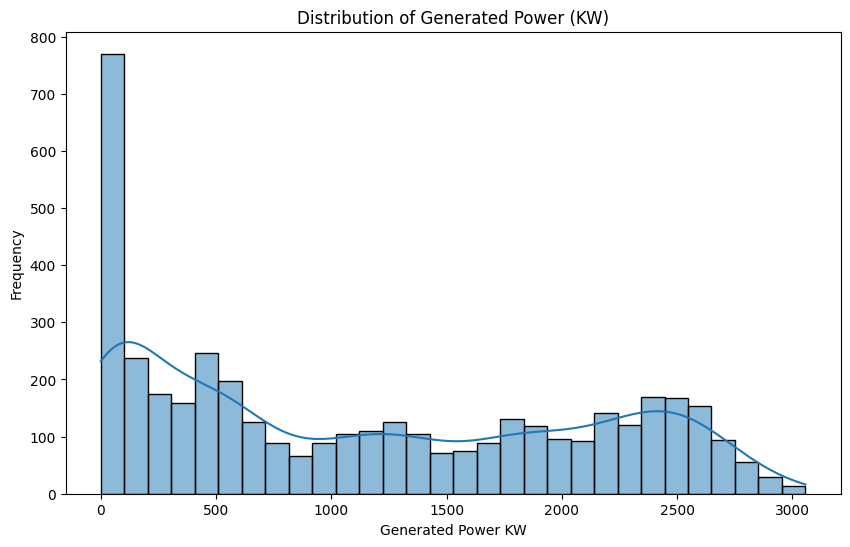

In [11]:







plt.figure(figsize=(10,6))
sns.histplot(df['generated_power_kw'], bins=30 ,kde=True)
plt.title('Distribution of Generated Power (KW)')
plt.xlabel('Generated Power KW')
plt.ylabel('Frequency')
plt.show()

In [12]:
df.head(2)

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940


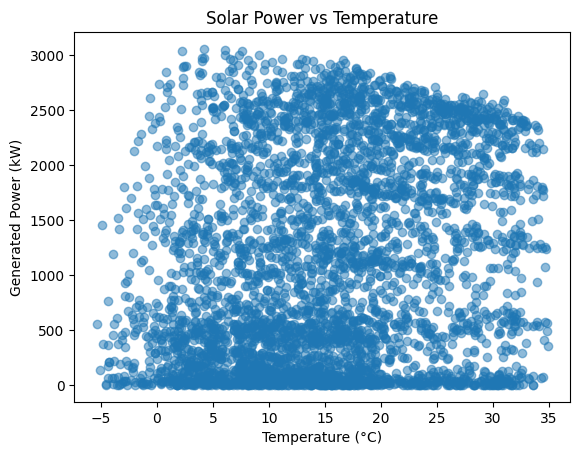

In [13]:
# Scatter plot
plt.scatter(df['temperature_2_m_above_gnd'], df['generated_power_kw'], alpha=0.5)
plt.xlabel('Temperature (°C)')
plt.ylabel('Generated Power (kW)')
plt.title('Solar Power vs Temperature')
plt.show()

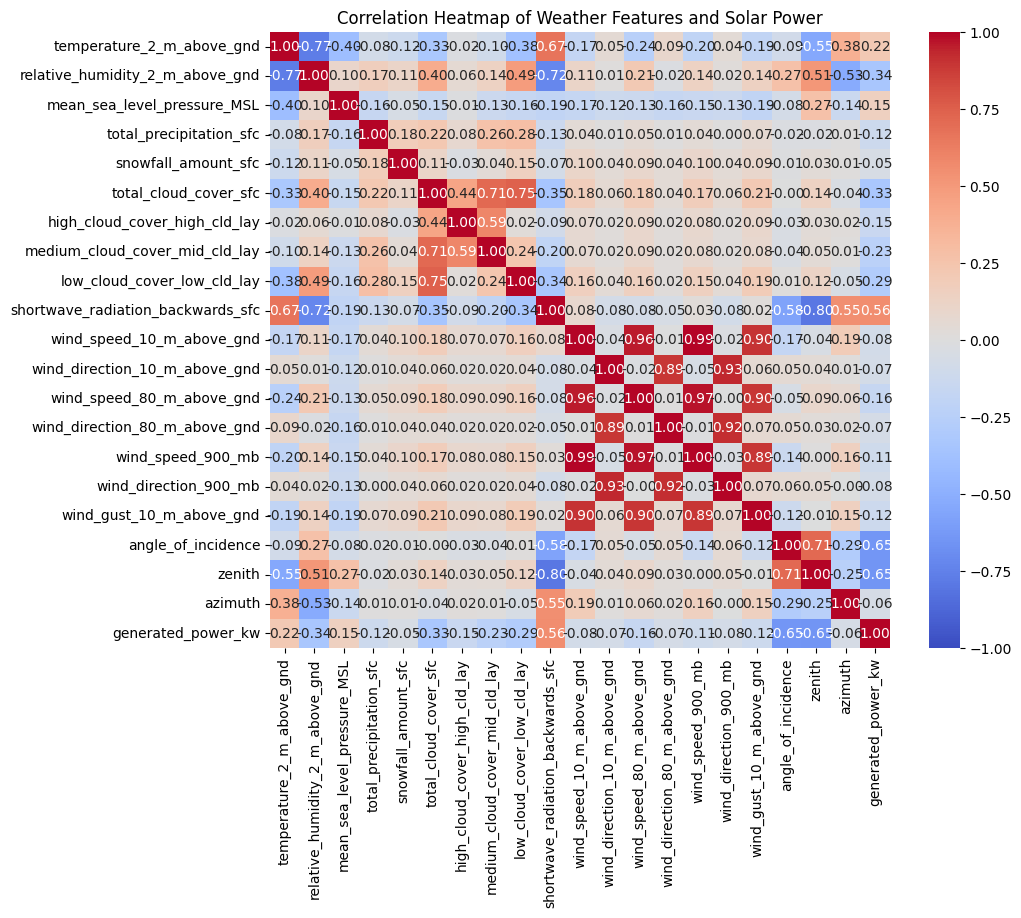

In [14]:
#To explore correlations between various weather-related features and solar power generation.
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Weather Features and Solar Power')
plt.show()

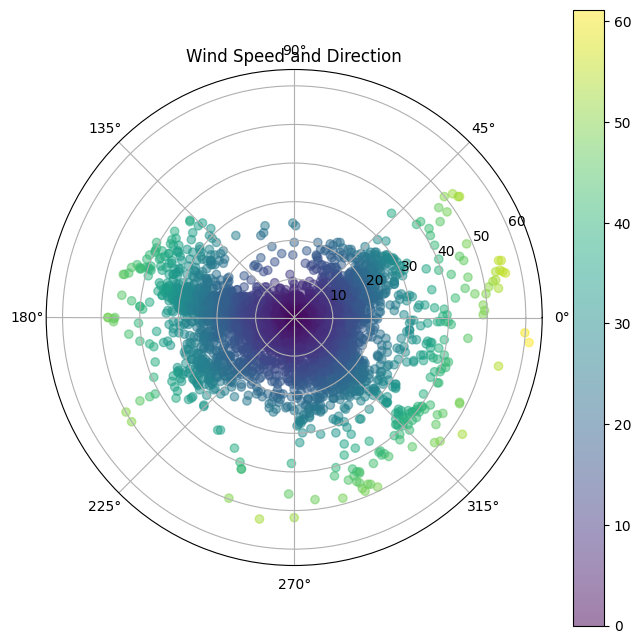

In [15]:
#To understand the distribution of wind speed and direction.
# Convert wind direction to radians
angles = np.radians(df['wind_direction_10_m_above_gnd'])
speeds = df['wind_speed_10_m_above_gnd']

plt.figure(figsize=(8, 8))
plt.subplot(projection='polar')
plt.scatter(angles, speeds, c=speeds, cmap='viridis', alpha=0.5)
plt.title('Wind Speed and Direction')
plt.colorbar()
plt.show()

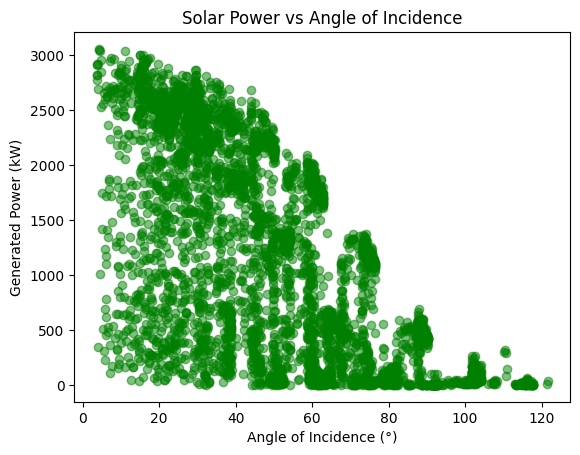

In [16]:
#To see the relationship between the angle of incidence of sunlight and the generated solar power.
from typing import ChainMap
plt.scatter(df['angle_of_incidence'], df['generated_power_kw'], alpha=0.5,c='green')
plt.xlabel('Angle of Incidence (°)')
plt.ylabel('Generated Power (kW)')
plt.title('Solar Power vs Angle of Incidence')
plt.show()

In [17]:
# It gives all numerical informtion of columns
df.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


In [18]:
# It give top rows of the dataset
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [19]:
# It give random row from dataset to check the entries of columns
df.sample(10)

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
475,5.74,52,1012.1,0.0,0.0,46.0,0,0,46,152.19,...,349.96,44.04,351.54,35.69,351.30,58.32,110.150150,112.030950,215.95507,299.884920
2451,27.07,26,1014.9,0.0,0.0,0.0,0,0,0,536.67,...,22.83,15.14,25.35,14.66,24.68,12.24,78.622857,67.137515,276.78601,23.547222
413,8.52,73,1014.1,0.1,0.0,40.0,0,0,40,539.34,...,320.83,27.89,320.76,24.29,320.41,27.36,44.628559,67.329881,227.67104,294.949300
3511,8.38,70,1022.4,0.0,0.0,17.0,0,0,17,349.77,...,34.82,21.97,34.99,19.77,33.11,24.48,23.884970,55.735569,152.09546,527.460830
1730,28.45,21,1018.2,0.0,0.0,10.0,0,10,0,867.75,...,163.14,13.10,164.05,12.31,164.74,11.88,32.351838,24.209078,225.17011,1431.586700
3615,9.36,93,1015.9,0.0,0.0,100.0,100,100,54,0.00,...,167.40,41.51,168.50,32.06,167.68,38.88,81.941039,93.631768,105.19078,286.662920
359,-0.79,79,1026.7,0.1,0.0,100.0,0,0,100,187.79,...,161.41,48.04,162.11,41.69,163.44,45.00,31.783186,62.005155,146.11820,354.877860
550,7.43,84,1025.7,0.0,0.0,100.0,0,20,100,42.72,...,307.57,12.98,313.88,11.72,312.51,16.56,44.991287,63.710982,128.46874,1210.498300
403,10.14,55,1016.1,0.0,0.0,100.0,100,100,0,388.04,...,285.71,25.96,286.93,22.55,286.70,34.92,44.546854,67.536977,227.35129,298.185820
708,6.73,45,1018.6,0.0,0.0,10.0,0,0,10,678.18,...,8.13,15.04,11.04,14.33,11.59,17.28,30.727565,51.208576,220.80628,1378.171200


In [20]:
# Shape before drop the columns contain only 0 value
df.shape

(4213, 21)

In [21]:
# In given dataset two columns conatain only 0 values for each row so we decide to drop both the columns
d = df.drop(['total_precipitation_sfc','snowfall_amount_sfc'], axis=1)

In [22]:
# Now new shape will be
d.shape

(4213, 19)

<Axes: ylabel='generated_power_kw'>

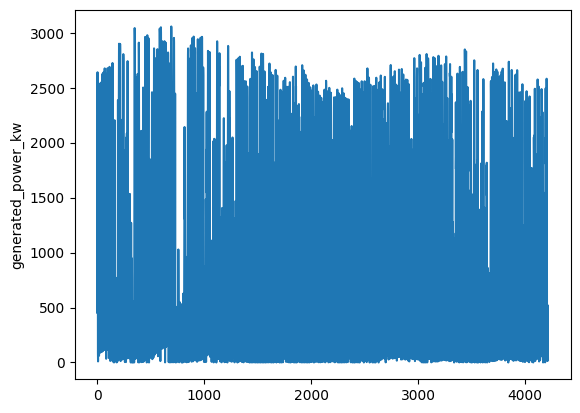

In [41]:
#line plot to get some overview of generated power
sns.lineplot(d['generated_power_kw'])


In [24]:
# for checking 5 rows sample from the dataset
d.sample(5)

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,wind_speed_10_m_above_gnd,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
1424,28.31,19,1019.6,30.0,100,26,0,325.74,20.17,272.05,27.00,270.76,21.60,270.95,24.12,90.949316,77.745292,283.953010,0.003846
2770,28.35,25,1015.6,0.0,0,0,0,857.07,2.60,236.31,3.05,225.00,2.81,219.81,8.64,24.247111,31.817614,212.633350,2311.519500
4050,9.41,68,1019.4,100.0,0,56,100,152.19,27.78,198.90,33.96,201.12,28.24,199.36,27.72,21.791321,64.729974,169.167370,1252.933100
1876,14.56,51,1011.0,35.0,0,35,35,283.91,8.56,284.62,7.64,278.13,6.92,278.97,12.60,54.288896,43.628097,261.342110,759.577360
791,2.68,95,1008.0,100.0,0,100,100,0.00,3.55,156.04,6.95,158.75,3.71,150.95,11.16,100.148470,97.048692,82.675455,13.485484


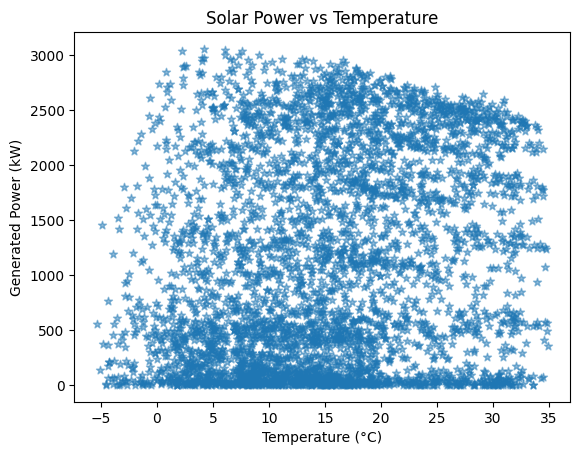

In [25]:
# Scatter plot
plt.scatter(df['temperature_2_m_above_gnd'], df['generated_power_kw'], alpha=0.5,marker='*')
plt.xlabel('Temperature (°C)')
plt.ylabel('Generated Power (kW)')
plt.title('Solar Power vs Temperature')
plt.show()

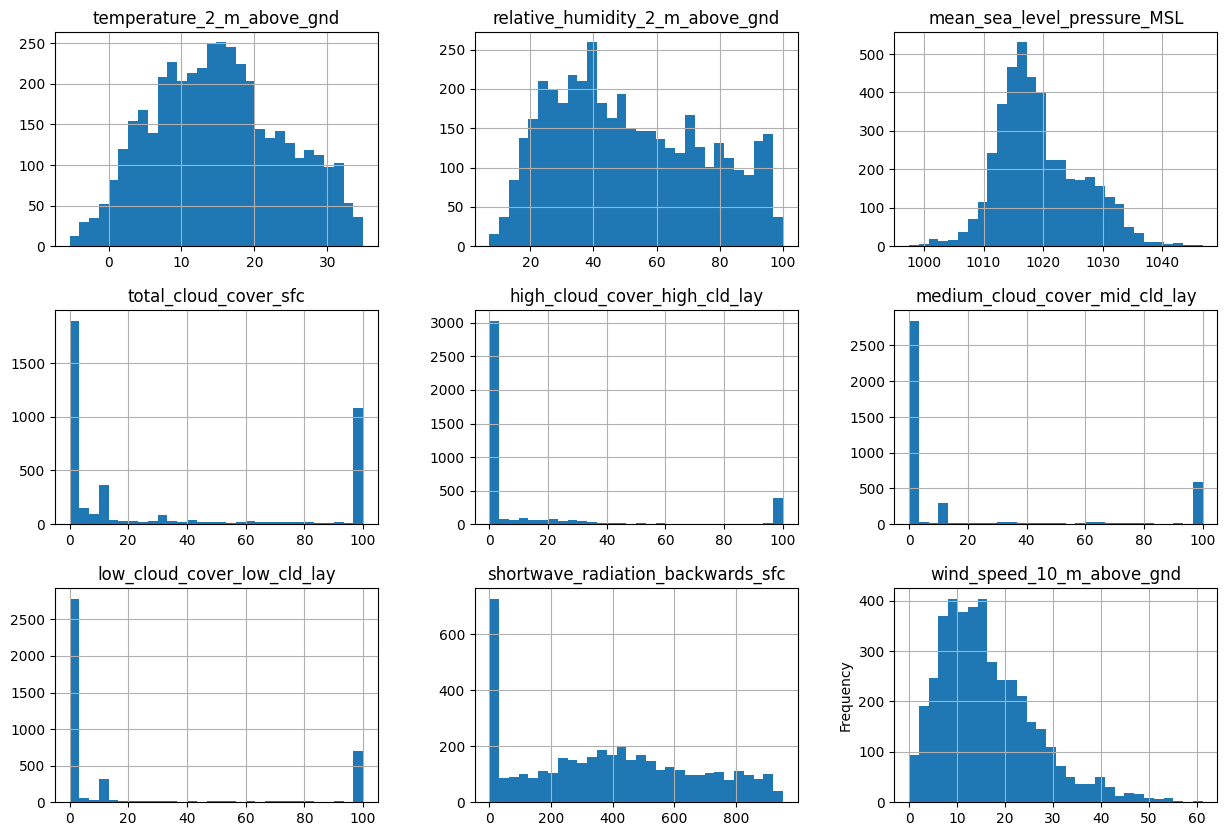

In [39]:
# Histogram for columns 0 to 9 columns
d[d.columns[:9]].hist(bins=30, figsize=(15,10))
plt.show()

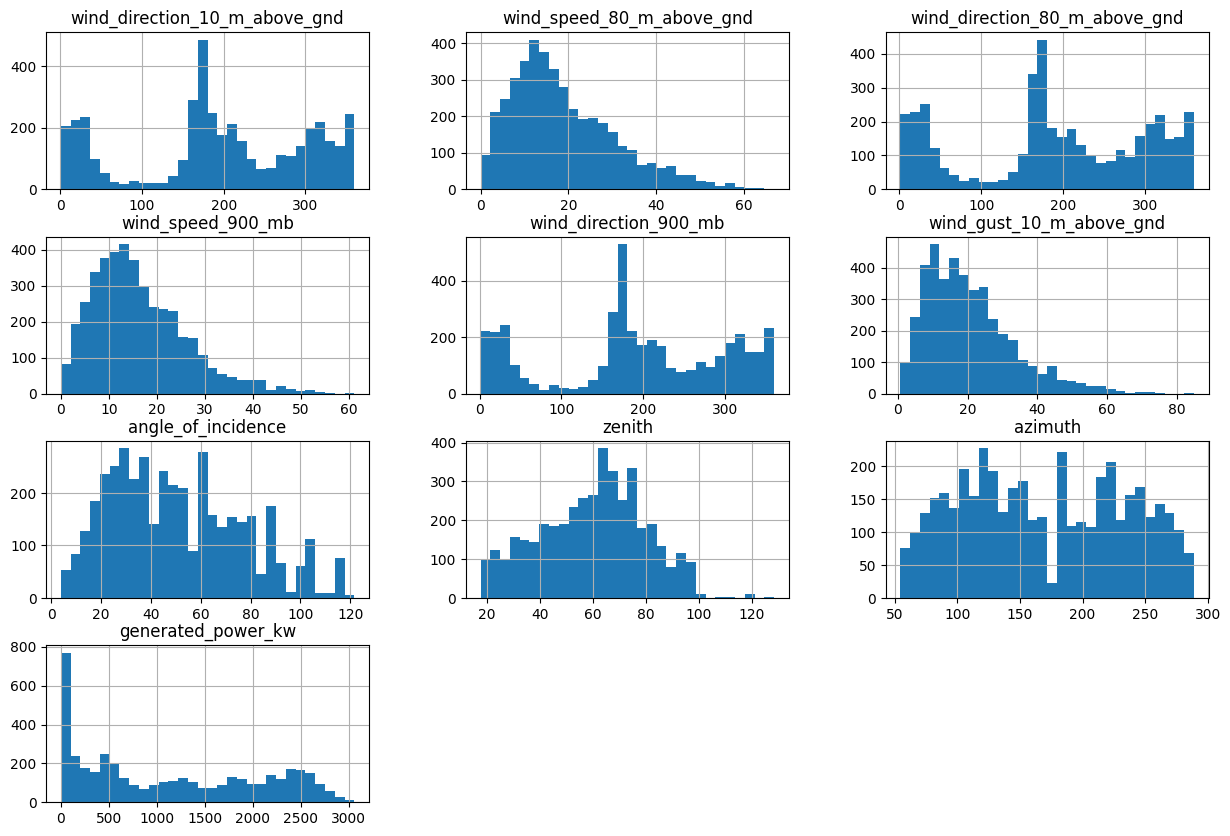

In [29]:
# Histogram for columns 9 to last columns
d[d.columns[9:]].hist(bins=30, figsize=(15,10))
plt.show()

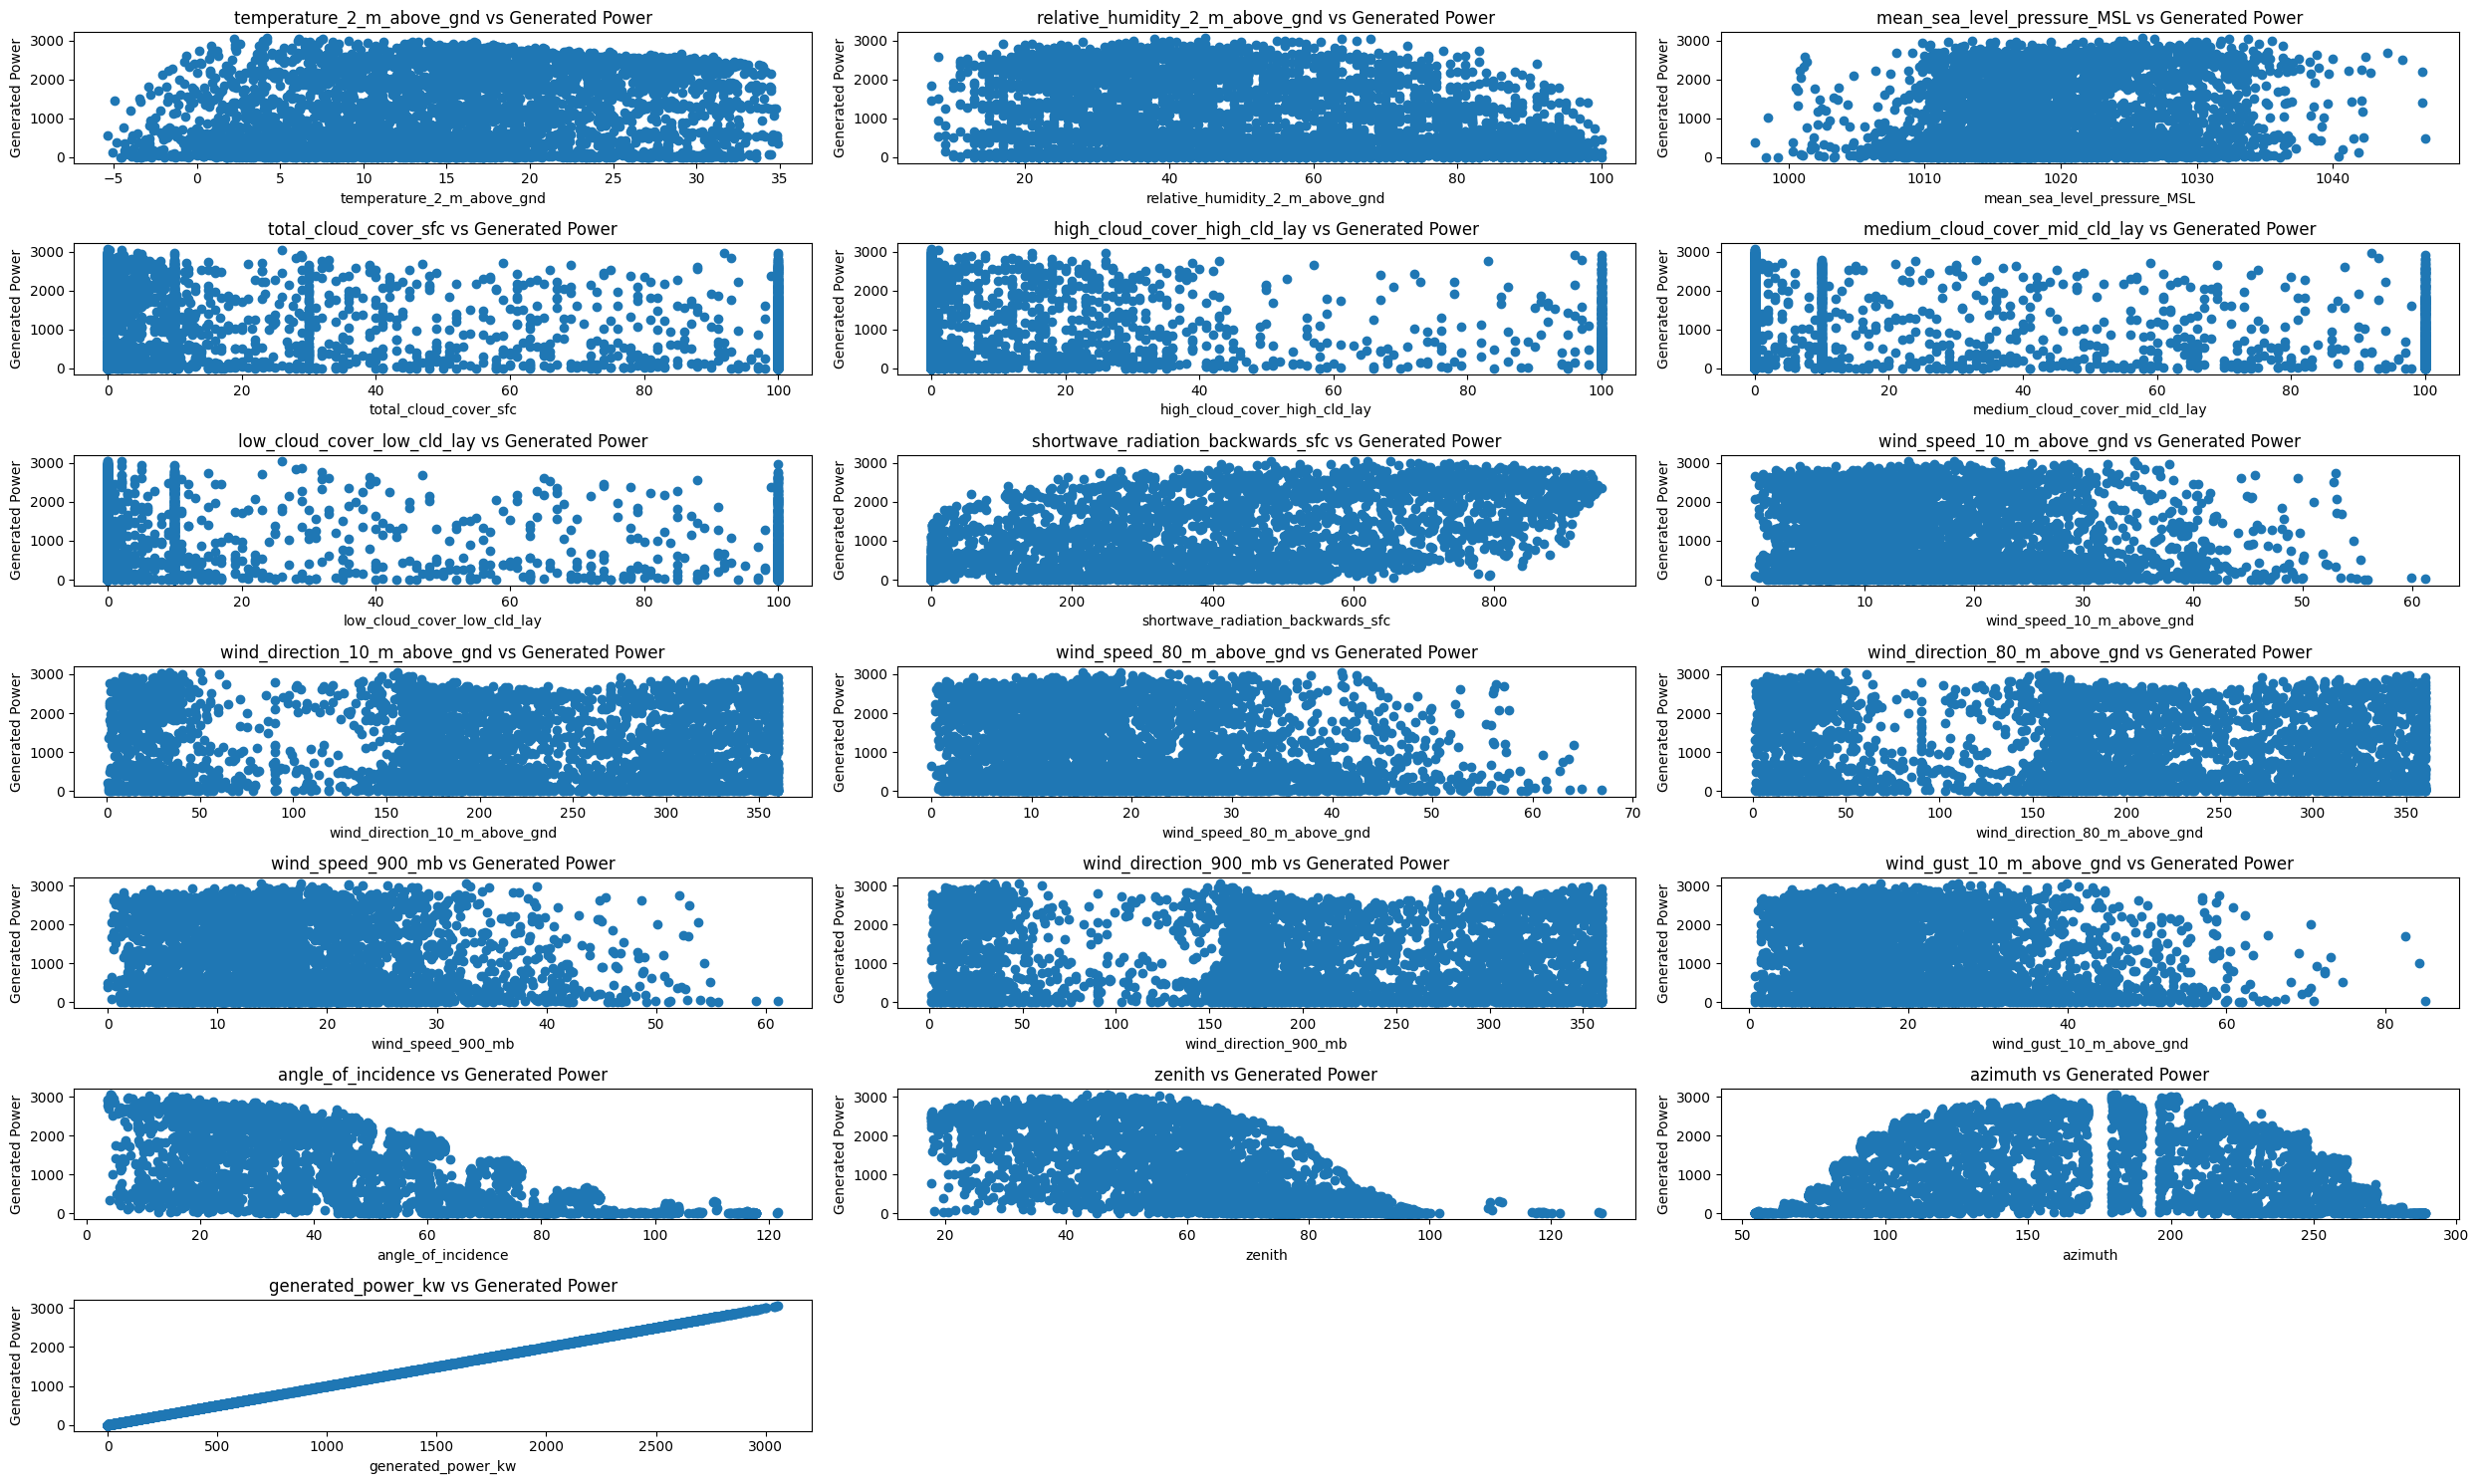

In [34]:
#Scatter plot for all columns
plt.figure(figsize=(25,15))
for i,columns in enumerate(d.columns):
  plt.subplot(7,3,i+1)
  plt.scatter(d[columns],d['generated_power_kw'])
  plt.title(f'{columns} vs Generated Power')
  plt.xlabel(f'{columns}')
  plt.ylabel('Generated Power')
plt.tight_layout()
plt.show()


In [35]:
d.corr()





,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,wind_speed_10_m_above_gnd,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
temperature_2_m_above_gnd,1.000000,-0.771704,-0.402240,-0.326641,-0.019522,-0.100980,-0.381876,0.665755,-0.172532,0.051393,-0.244869,0.086630,-0.198107,0.043233,-0.188264,-0.090173,-0.545646,0.381797,0.217280
relative_humidity_2_m_above_gnd,-0.771704,1.000000,0.100529,0.402895,0.056452,0.135347,0.490402,-0.721754,0.109674,0.008902,0.212868,-0.019408,0.135464,0.021068,0.144807,0.268460,0.513748,-0.525760,-0.336783
mean_sea_level_pressure_MSL,-0.402240,0.100529,1.000000,-0.151995,-0.014646,-0.129812,-0.162043,-0.188387,-0.170199,-0.119867,-0.131442,-0.161020,-0.145696,-0.125234,-0.189266,-0.075619,0.268111,-0.137872,0.150551
total_cloud_cover_sfc,-0.326641,0.402895,-0.151995,1.000000,0.442865,0.712077,0.746225,-0.345089,0.175869,0.055057,0.183732,0.039671,0.174510,0.057816,0.212142,-0.003426,0.136249,-0.037427,-0.334338
high_cloud_cover_high_cld_lay,-0.019522,0.056452,-0.014646,0.442865,1.000000,0.593300,0.024703,-0.089620,0.069620,0.017688,0.090049,0.018228,0.078204,0.020897,0.092842,-0.033840,0.031766,0.020790,-0.147723
medium_cloud_cover_mid_cld_lay,-0.100980,0.135347,-0.129812,0.712077,0.593300,1.000000,0.236716,-0.199843,0.069307,0.016954,0.088972,0.021935,0.076192,0.017195,0.079627,-0.035511,0.046719,0.014802,-0.227834
low_cloud_cover_low_cld_lay,-0.381876,0.490402,-0.162043,0.746225,0.024703,0.236716,1.000000,-0.336751,0.161919,0.040060,0.156204,0.021782,0.153578,0.039875,0.193846,0.013421,0.120854,-0.054328,-0.288066
shortwave_radiation_backwards_sfc,0.665755,-0.721754,-0.188387,-0.345089,-0.089620,-0.199843,-0.336751,1.000000,0.078791,-0.076530,-0.077090,-0.051670,0.028929,-0.081545,0.017212,-0.576921,-0.801892,0.549296,0.556148
wind_speed_10_m_above_gnd,-0.172532,0.109674,-0.170199,0.175869,0.069620,0.069307,0.161919,0.078791,1.000000,-0.035788,0.957745,-0.005156,0.992851,-0.017289,0.898893,-0.173060,-0.041168,0.194680,-0.083043
wind_direction_10_m_above_gnd,0.051393,0.008902,-0.119867,0.055057,0.017688,0.016954,0.040060,-0.076530,-0.035788,1.000000,-0.023300,0.891487,-0.046880,0.930226,0.059981,0.054676,0.044775,0.009908,-0.073257


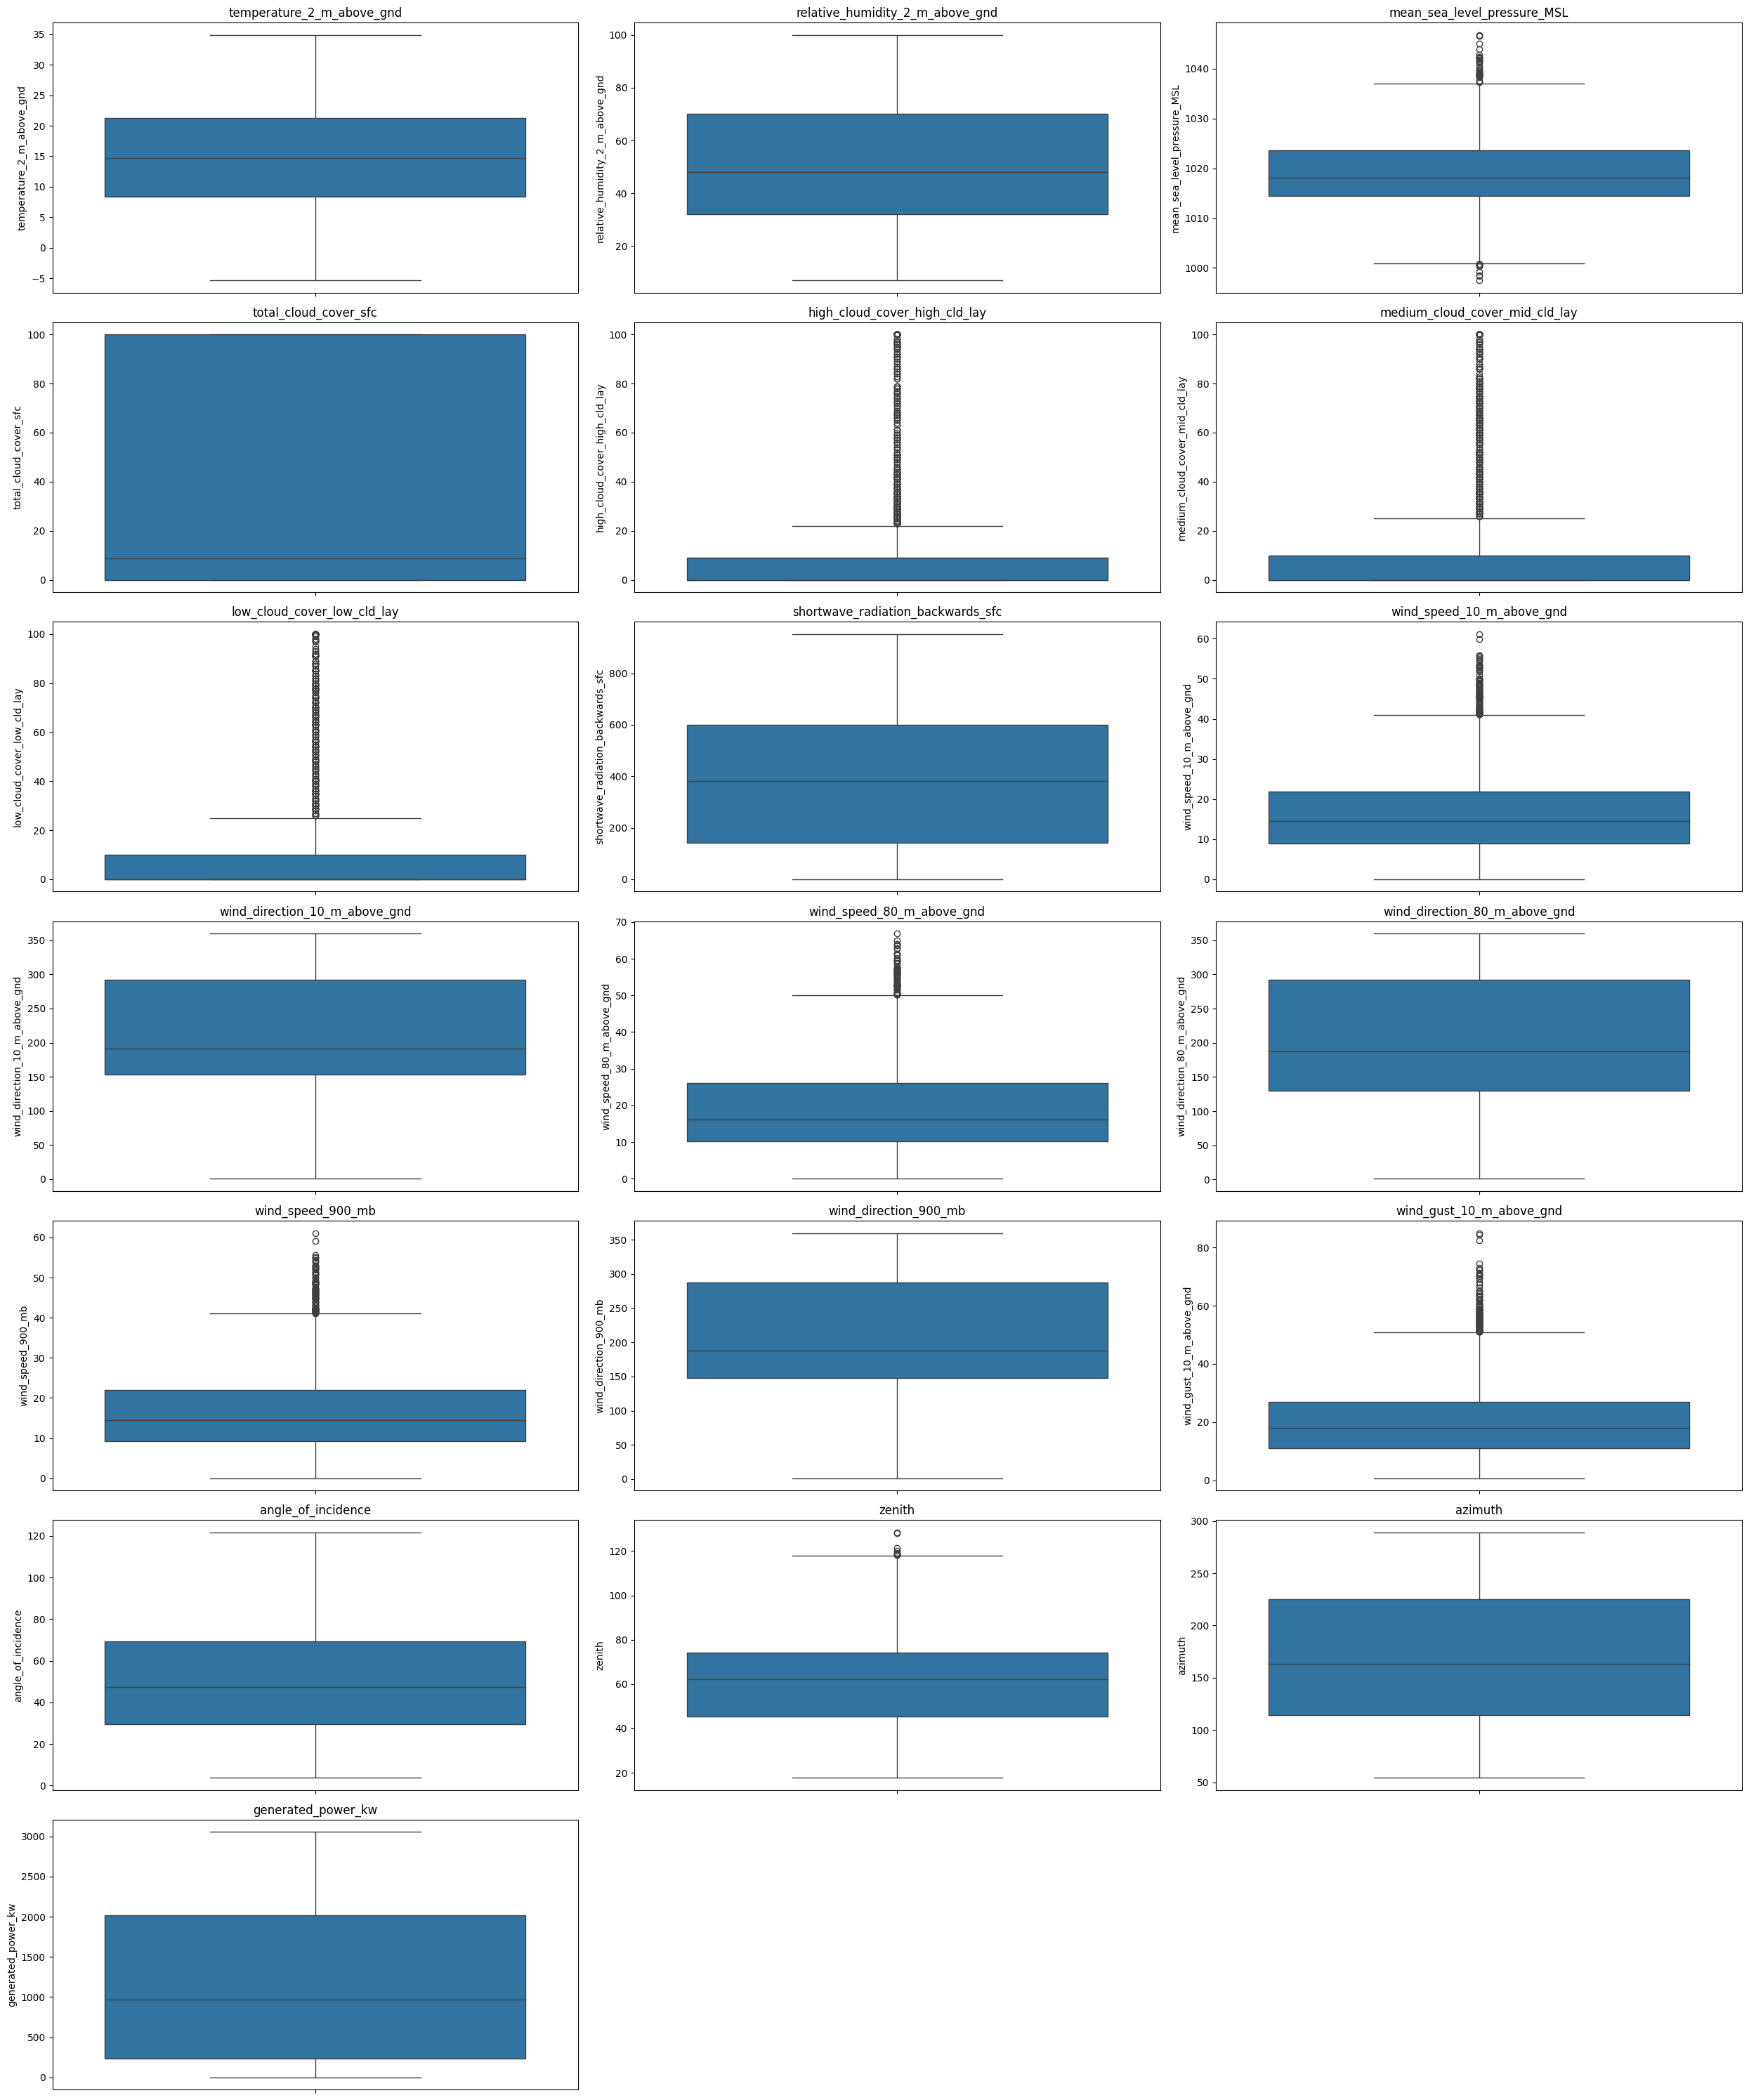

In [38]:
#Outliers
plt.figure(figsize=(25,30))
for i,columns in enumerate(d.columns):
  plt.subplot(7,3,i+1)
  sns.boxplot(d[columns])
  plt.title(f'{columns}')
plt.tight_layout()
plt.show()